# Campaña de Marketing Bancario

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Modelado
from sklearn.linear_model import LogisticRegression
# Métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# from tqdm import tqdm
#import warnings

## Paso 1: Recopilación de datos y definición del problema

In [27]:
df = pd.read_csv('../data/raw/bank-marketing-campaign-data.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


- `age` Edad del cliente (numérico) 
- `job` Tipo de trabajo (categórico)
- `marital` Estado civil (categórico)
- `education` Nivel de educación (categórico)
- `default` ¿Tiene crédito actualmente? (categórico)
- `housing` ¿Tiene un préstamo de vivienda? (categórico)
- `loan` ¿Tiene un préstamo personal? (categórico)
- `contact` Tipo de comunicación de contacto (categórico)
- `month` Último mes en el que se le ha contactado (categórico)
- `day_of_week` Último día en el que se le ha contactado (categórico)
- `duration` Duración del contacto previo en segundos (numérico)
- `campaign` Número de contactos realizados durante esta campaña al cliente (numérico)
- `pdays` Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)
- `previous` Número de contactos realizados durante la campaña anterior al cliente (numérico)
- `poutcome` Resultado de la campaña de marketing anterior (categórico)
- `emp.var.rate` Tasa de variación del empleo. Indicador trimestral (numérico)
- `cons.price.idx` Índice de precios al consumidor. Indicador mensual (numérico)
- `cons.conf.idx` Índice de confianza del consumidor. Indicador mensual (numérico)
- `euribor3m` Tasa EURIBOR 3 meses. Indicador diario (numérico)
- `nr.employed` Número de empleados. Indicador trimestral (numérico)
- `y. TARGET` El cliente contrata un depósito a largo plazo o no (categórico)

> ¿Qué perfil de cliente es propenso a contratar un depósito a largo plazo?

## Paso 1: Recopilación de datos y definición del problema

In [28]:
df.shape

(41188, 21)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


> ### Observaciones:
>
> - Existen un total de 41188 filas (en este caso, clientes) y 21 columnas, entre las cuales encontramos el target o clase a predecir, `y`.
> - Ningúna de las variables contiene valores nulos.
> - Los datos cuentan con 10 características numéricas y 11 características categóricas.

## Paso 2: EDA

### Limpieza de datos: Eliminar duplicados

In [31]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

In [32]:
df.duplicated().sum()

np.int64(12)

In [33]:
# To show all the duplicated raws 
duplicated = df[df.duplicated(keep=False)]
duplicated

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [34]:
# To modify deleting duplicated ones and create a new copy of data frame
df.drop_duplicates(inplace=True)

In [35]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Limpieza de datos: Eliminar información irrelevante

> ### Observaciones:
>
> Para decidir si debemos eliminar datos irrelevantes, es necesario analizar cuidadosamente toda la información antes de tomar una decisión.

In [36]:
df['poutcome'].value_counts()

poutcome
nonexistent    35551
failure         4252
success         1373
Name: count, dtype: int64

In [37]:
df['loan'][df['y'] == 'yes'].value_counts()

loan
no         3849
yes         683
unknown     107
Name: count, dtype: int64

In [38]:
df['job'][df['y'] == 'yes'].value_counts()

job
admin.           1351
technician        730
blue-collar       638
retired           434
management        328
services          323
student           275
self-employed     149
unemployed        144
entrepreneur      124
housemaid         106
unknown            37
Name: count, dtype: int64

In [39]:
df['housing'][df['y'] == 'yes'].value_counts()

housing
yes        2507
no         2025
unknown     107
Name: count, dtype: int64

In [40]:
df['marital'][df['y'] == 'yes'].value_counts()

marital
married     2531
single      1620
divorced     476
unknown       12
Name: count, dtype: int64

In [41]:
df['education'][df['y'] == 'yes'].value_counts()

education
university.degree      1669
high.school            1031
professional.course     595
basic.9y                473
basic.4y                428
unknown                 251
basic.6y                188
illiterate                4
Name: count, dtype: int64

> ### Observaciones:
>
> Después de haber revisado varias columnas, podemos ver que por ahora nos interesa dejar todos los datos, porque todos parecen ser relevantes.  
> Para tomar una mejor decisión, también podemos analizar un gráfico de correlación, considerando por ahora las columnas categóricas en relación con la variable target.

In [42]:
df['education_n'] = pd.factorize(df['education'])[0]
df['y_n'] = pd.factorize(df['y'])[0]
df['marital_n'] = pd.factorize(df['marital'])[0]
df['housing_n'] = pd.factorize(df['housing'])[0]
df['default_n'] = pd.factorize(df['default'])[0]
df['loan_n'] = pd.factorize(df['loan'])[0]
df['job_n'] = pd.factorize(df['job'])[0]
df['poutcome_n'] = pd.factorize(df['poutcome'])[0]

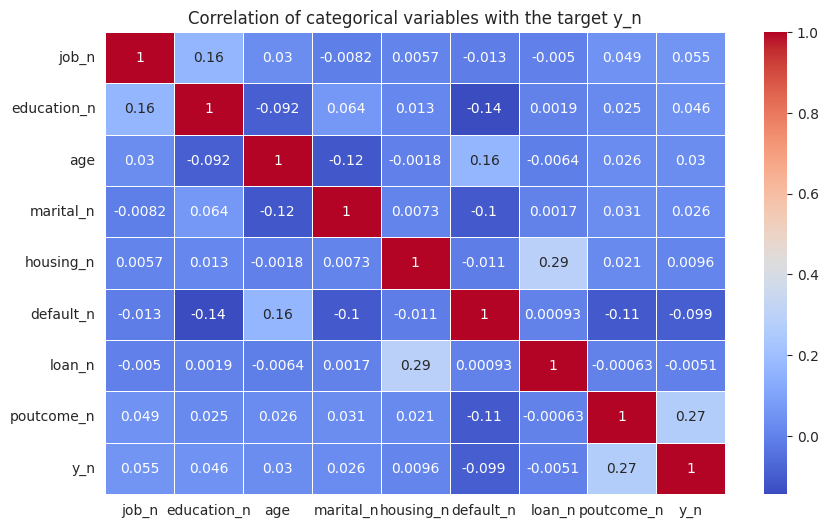

In [43]:
corr = df[['job_n', 'education_n', 'age', 'marital_n', 'housing_n', 'default_n', 'loan_n', 'poutcome_n', 'y_n']].corr()

fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation of categorical variables with the target y_n')
plt.show()

> ### Observaciones
>
> Según el mapa de correlación que mostramos, no parece haber variables con correlaciones fuertes ni redundancias evidentes, por lo que no sería recomendable eliminar ninguna variable por ahora basándonos solo en esta matriz.

### Análisis de Variables

#### Análisis de Variables Univariante Categóricas

Las variables categóricas son: `y`, `job`, `education`, `marital`, `housing`, `loan`, `contact`, `poutcome`, `month`, `day_of_week` y `default`.

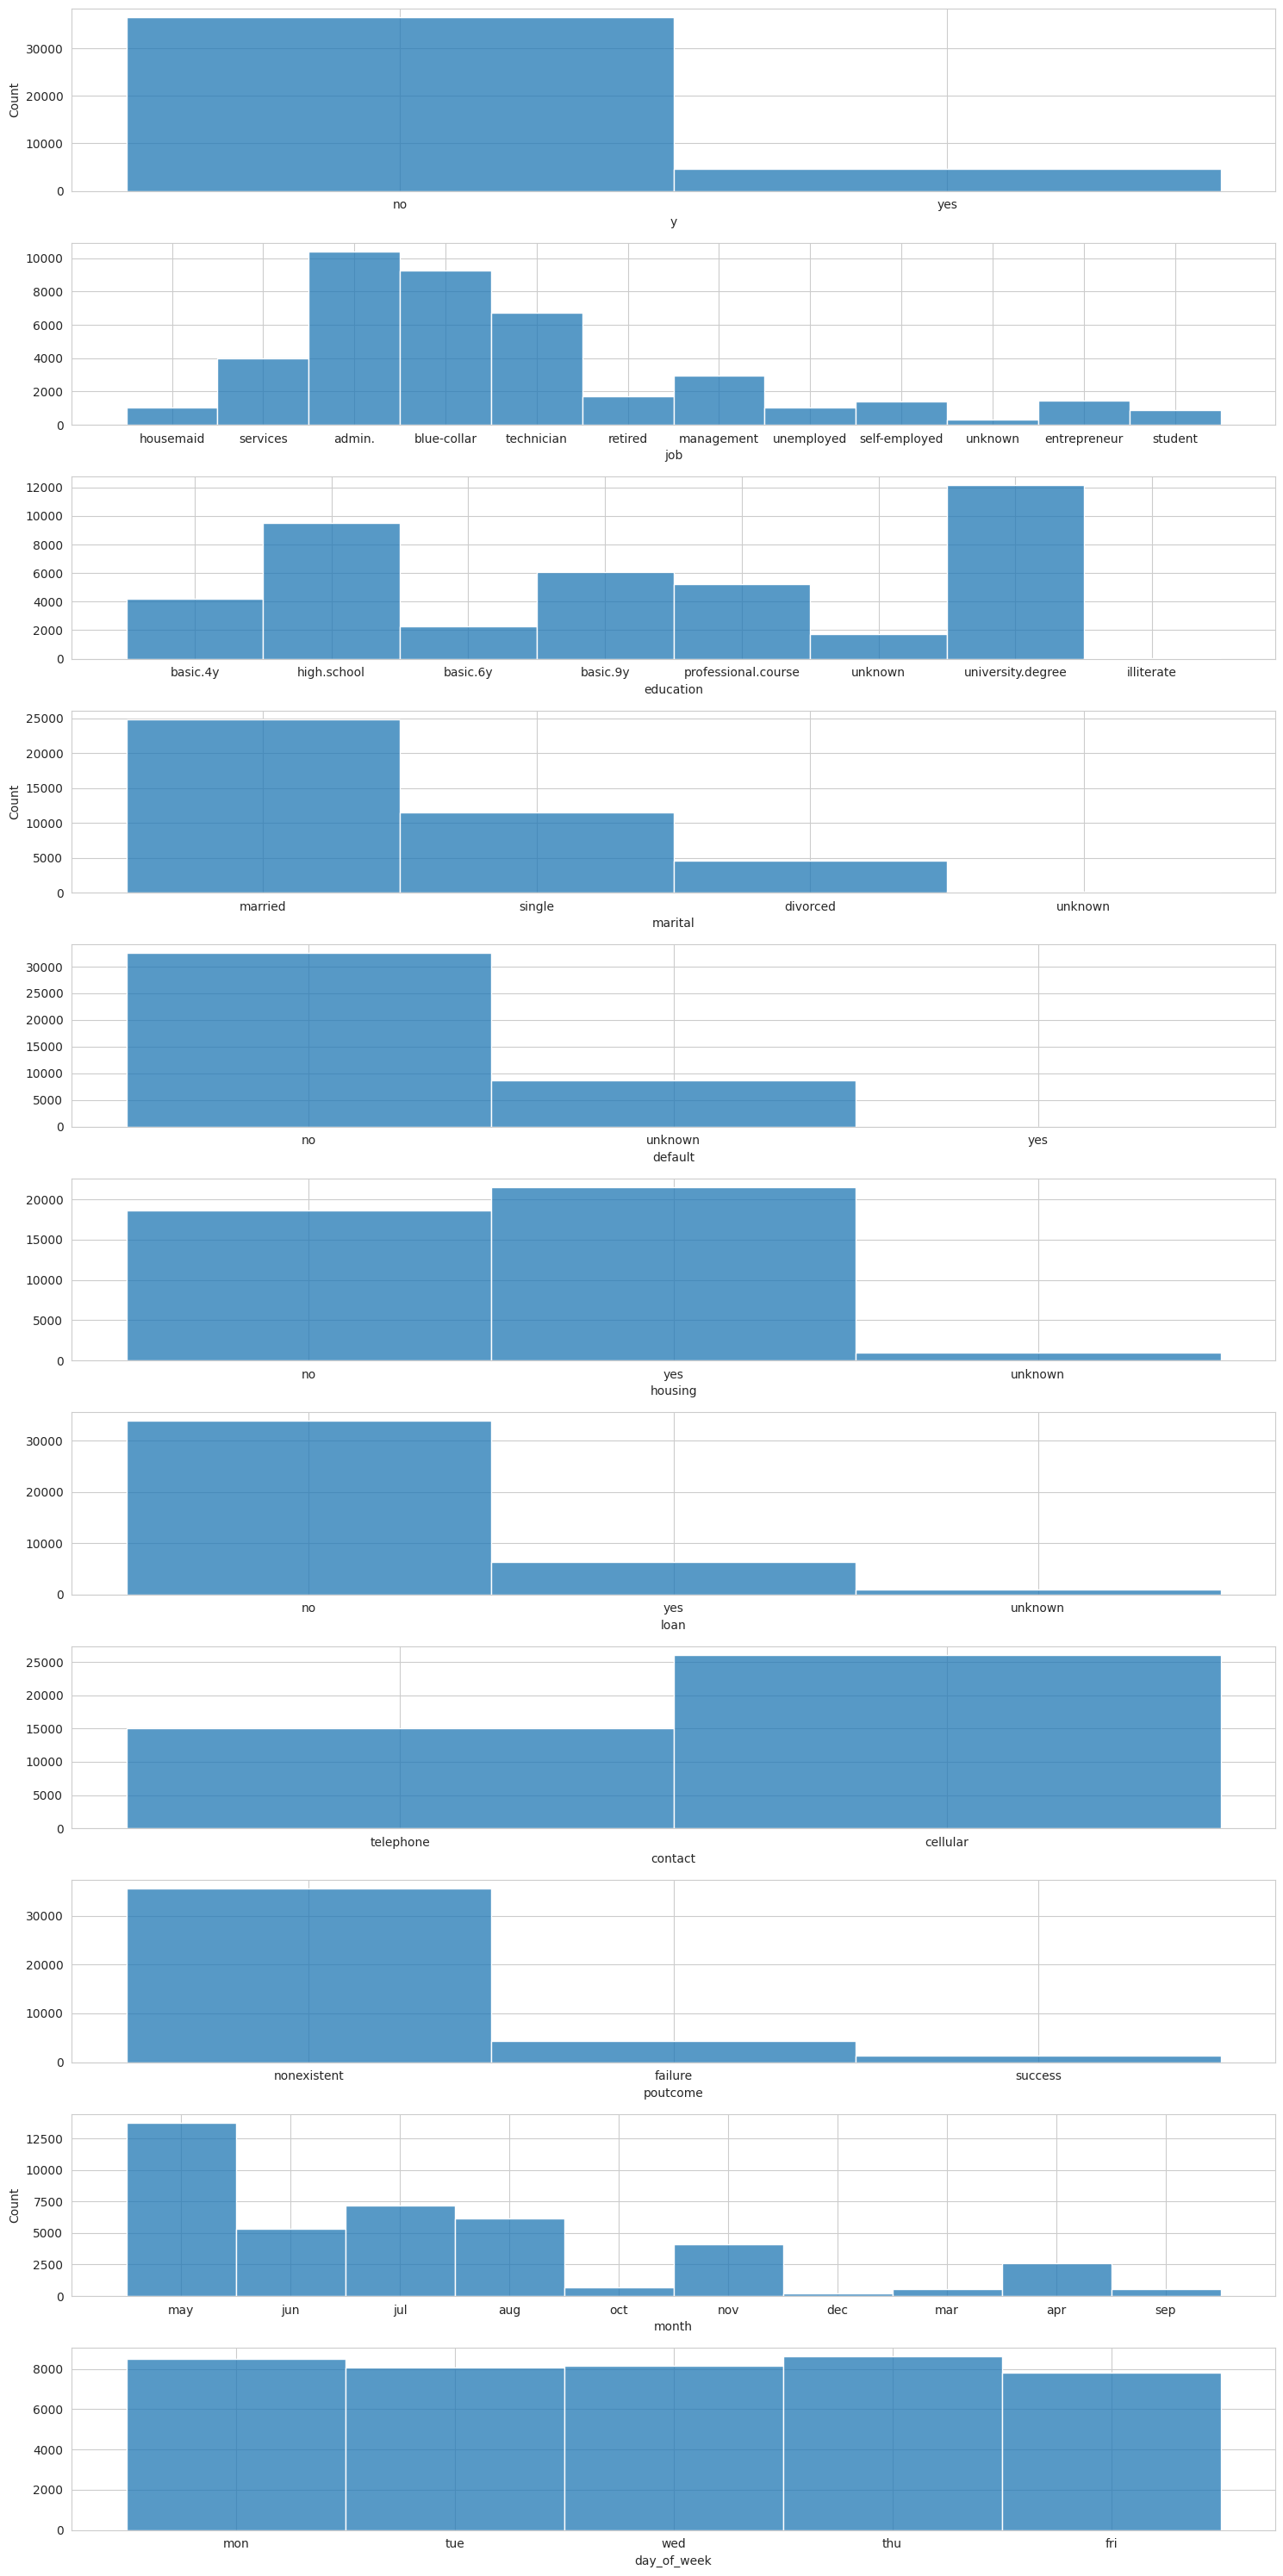

In [44]:
fig, axis = plt.subplots(11, 1, figsize=(15, 30))

sns.histplot(ax=axis[0], data=df, x='y').set
sns.histplot(ax=axis[1], data=df, x='job').set(ylabel=None)
sns.histplot(ax=axis[2], data=df, x='education').set(ylabel=None)
sns.histplot(ax=axis[3], data=df, x='marital')
sns.histplot(ax=axis[4], data=df, x='default').set(ylabel=None)
sns.histplot(ax=axis[5], data=df, x='housing').set(ylabel=None)
sns.histplot(ax=axis[6], data=df, x='loan').set(ylabel=None)
sns.histplot(ax=axis[7], data=df, x='contact').set(ylabel=None)
sns.histplot(ax=axis[8], data=df, x='poutcome').set(ylabel=None)
sns.histplot(ax=axis[9], data=df, x='month')
sns.histplot(ax=axis[10], data=df, x='day_of_week').set(ylabel=None)

plt.tight_layout()
plt.show()

> #### Observaciones
>
> Con la representación de cada variable podemos determinar que:
>
> - **Y**: Se observa que la cantidad de personas que no han contratado un depósito es considerablemente mayor que la de quienes lo han hecho, indicando una clara preferencia por la contratación.
> - **Job**: Las categorías de trabajo ‘admin’, ‘blue-collar’ y ‘technician’ concentran la mayor parte de los individuos del conjunto de datos, lo que indica que la muestra está dominada por estos perfiles laborales.
> - **Education**: La mayoría de los clientes tiene formación universitaria, seguida por secundaria y formación profesional, mientras que los niveles básicos y sin escolaridad representan una proporción mínima.
> - **Marital**: Predominan las personas casadas, seguidas por solteras y en menor medida divorciadas, mostrando una distribución mayormente concentrada en individuos con vínculo matrimonial.
> - **Default**: La mayoría de los clientes actualmente no tiene ningún crédito. 
> - **Housing**: La cantidad de personas que no tienen actualmente un préstamo para su vivienda es muy similar a la cantidad de personas que sí lo tienen.
> - **Loan**: Mayoría de los clientes no tiene el préstamo personal. 
> - **Contact**: El número de clientes contactados por teléfono celular es aproximadamente el doble que el de aquellos contactados por línea fija, lo que refleja una clara preferencia por el uso de canales móviles en la comunicación con los clientes.
> - **Poutcome**: La mayoría de los clientes no participó en la campaña anterior, y entre los que sí, los resultados exitosos fueron muy pocos comparados con los fallidos.
> - **Month**: Se observa una concentración de contactos durante los meses de mayo, junio, julio y agosto, lo que sugiere una mayor intensidad de la campaña o una planificación focalizada en el período de mitad de año.
> - **Day_of_week**: El gráfico del número de días transcurridos desde la última campaña hasta el nuevo contacto muestra una distribución homogénea a lo largo de los días laborables (de lunes a viernes). Esto indica que no existe una preferencia marcada por un día específico para realizar los contactos, sino una estrategia de comunicación continua y uniforme durante la semana.

#### Análisis de Variables Univariante Numéricas

Las variables númericas son: `age`, `duration`, `campaign`, `pdays`, `previous`, `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m` y `nr.employed`.

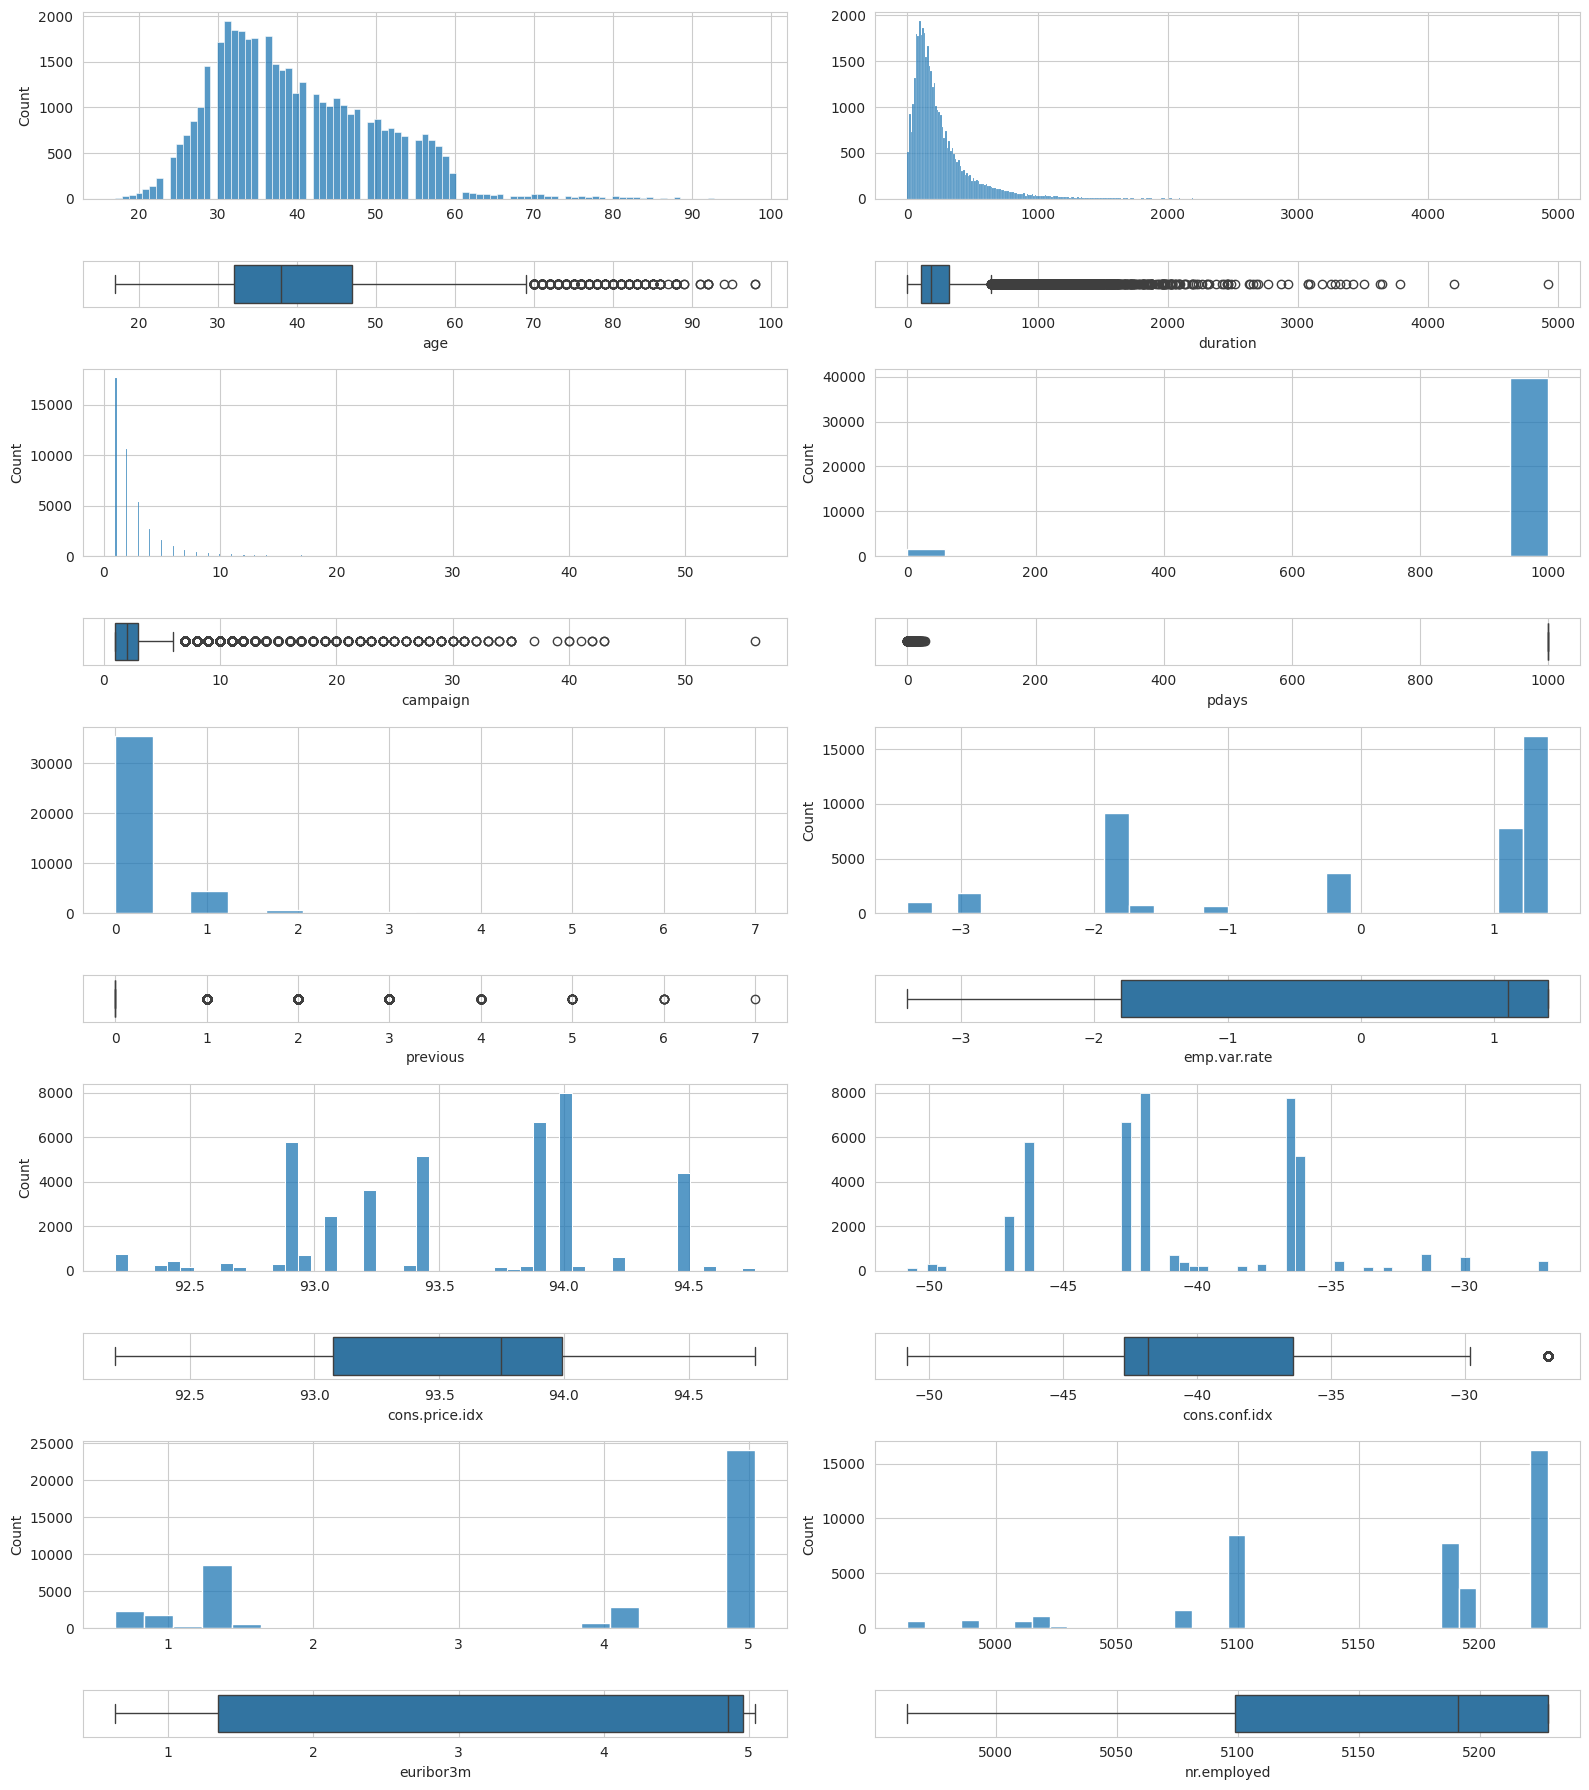

In [45]:
fig, axis = plt.subplots(10, 2, figsize=(16, 18), gridspec_kw={'height_ratios': [8, 2, 8, 2, 8, 2, 8, 2, 8, 2]})

# Creating a multiple figure with histograms and box plots
sns.set_style('whitegrid')
sns.histplot(ax=axis[0, 0], data=df, x='age').set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x='age')
sns.histplot(ax=axis[0, 1], data=df, x='duration').set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x='duration')
sns.histplot(ax=axis[2, 0], data=df, x='campaign').set(xlabel=None)
sns.boxplot(ax=axis[3, 0], data=df, x='campaign')
sns.histplot(ax=axis[2, 1], data=df, x='pdays').set(xlabel=None)
sns.boxplot(ax=axis[3, 1], data=df, x='pdays')
sns.histplot(ax=axis[4, 0], data=df, x='previous').set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[5, 0], data=df, x='previous')
sns.histplot(ax=axis[4, 1], data=df, x='emp.var.rate').set(xlabel=None)
sns.boxplot(ax=axis[5, 1], data=df, x='emp.var.rate')
sns.histplot(ax=axis[6, 0], data=df, x='cons.price.idx').set(xlabel=None)
sns.boxplot(ax=axis[7, 0], data=df, x='cons.price.idx')
sns.histplot(ax=axis[6, 1], data=df, x='cons.conf.idx').set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[7, 1], data=df, x='cons.conf.idx')
sns.histplot(ax=axis[8, 0], data=df, x='euribor3m').set(xlabel=None)
sns.boxplot(ax=axis[9, 0], data=df, x='euribor3m')
sns.histplot(ax=axis[8, 1], data=df, x='nr.employed').set(xlabel=None)
sns.boxplot(ax=axis[9, 1], data=df, x='nr.employed')

# Adjust the layout
plt.tight_layout()
plt.show()

> #### Observaciones:
>
> - A partir de la visualización obtenida, se puede observar que las primeras cinco variables presentan valores atípicos.

### Análisis de Variables Multivariante

#### Análisis numérico-numérico

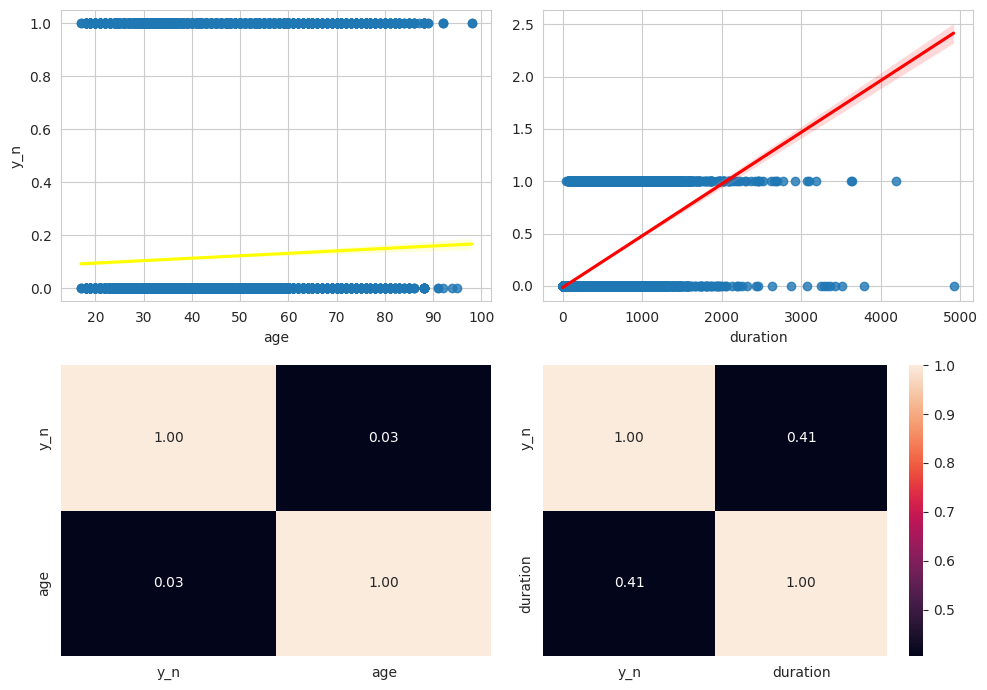

In [46]:
corr_y_age = df[['y_n', 'age']].corr()
corr_y_duration = df[['y_n', 'duration']].corr()

# Crear un diagrama de dispersión múltiple
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

sns.regplot(ax=axis[0, 0], data=df, x='age', y='y_n', line_kws={'color': 'yellow'})
sns.heatmap(ax=axis[1, 0], data=corr_y_age, annot=True, fmt=".2f", cbar=False)

sns.regplot(ax=axis[0, 1], data=df, x='duration', y='y_n', line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 1], data=corr_y_duration, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

In [47]:
numerical_variables = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
mask = np.triu(np.ones_like(corr, dtype=bool))

corr = df[numerical_variables].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, mask=mask, linewidths=0.5, fmt=".2f", cmap='coolwarm')

plt.tight_layout()
plt.show()

ValueError: Mask must have the same shape as data.

<Figure size 800x600 with 0 Axes>

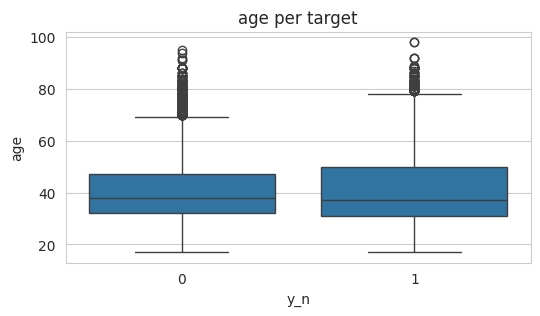

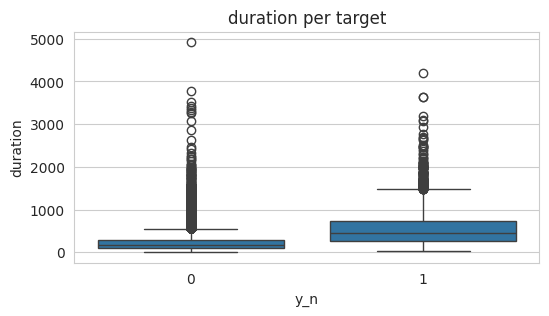

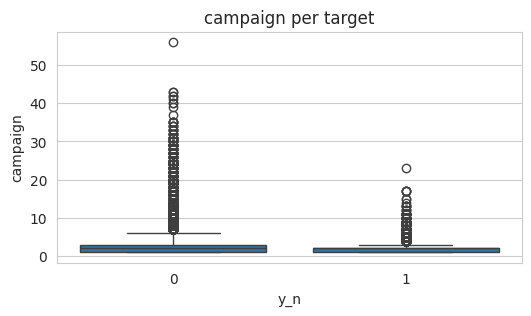

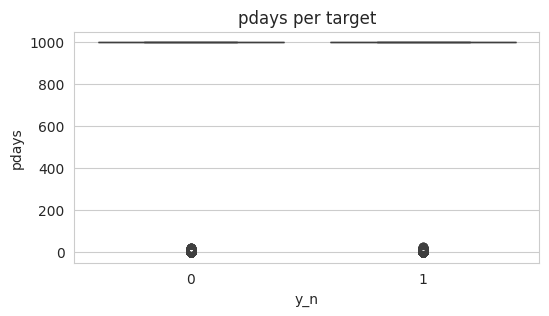

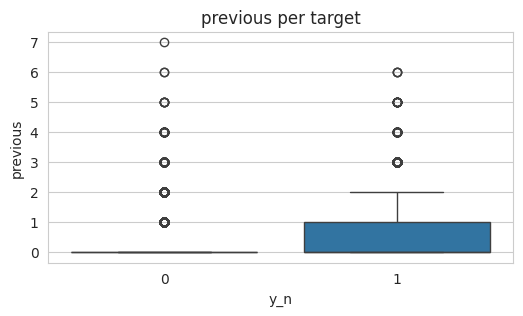

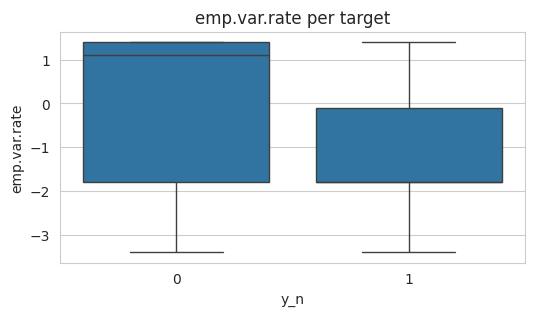

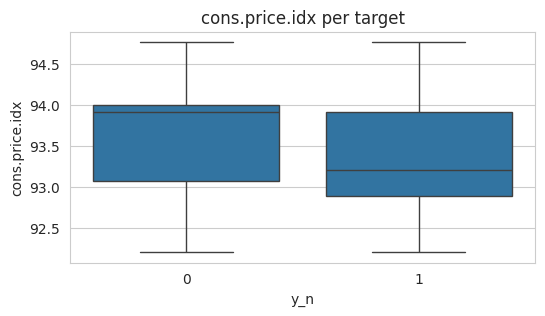

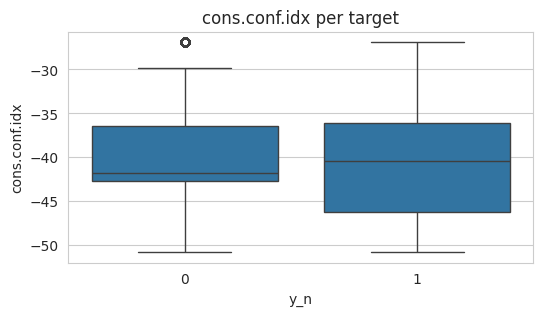

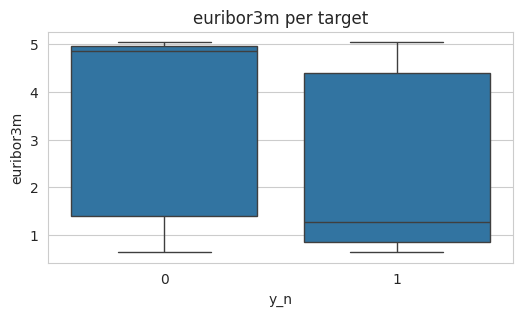

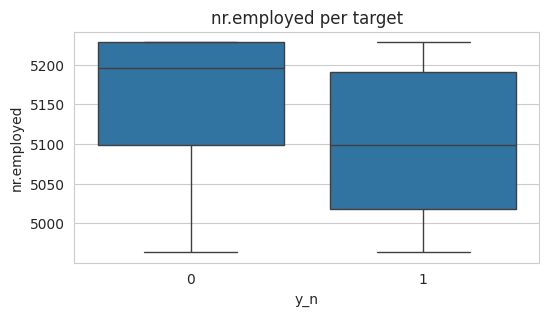

In [ ]:
numerical_variables = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for _ in numerical_variables:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='y_n', y=_, data=df)
    plt.title(f'{_} per target')
    plt.show()


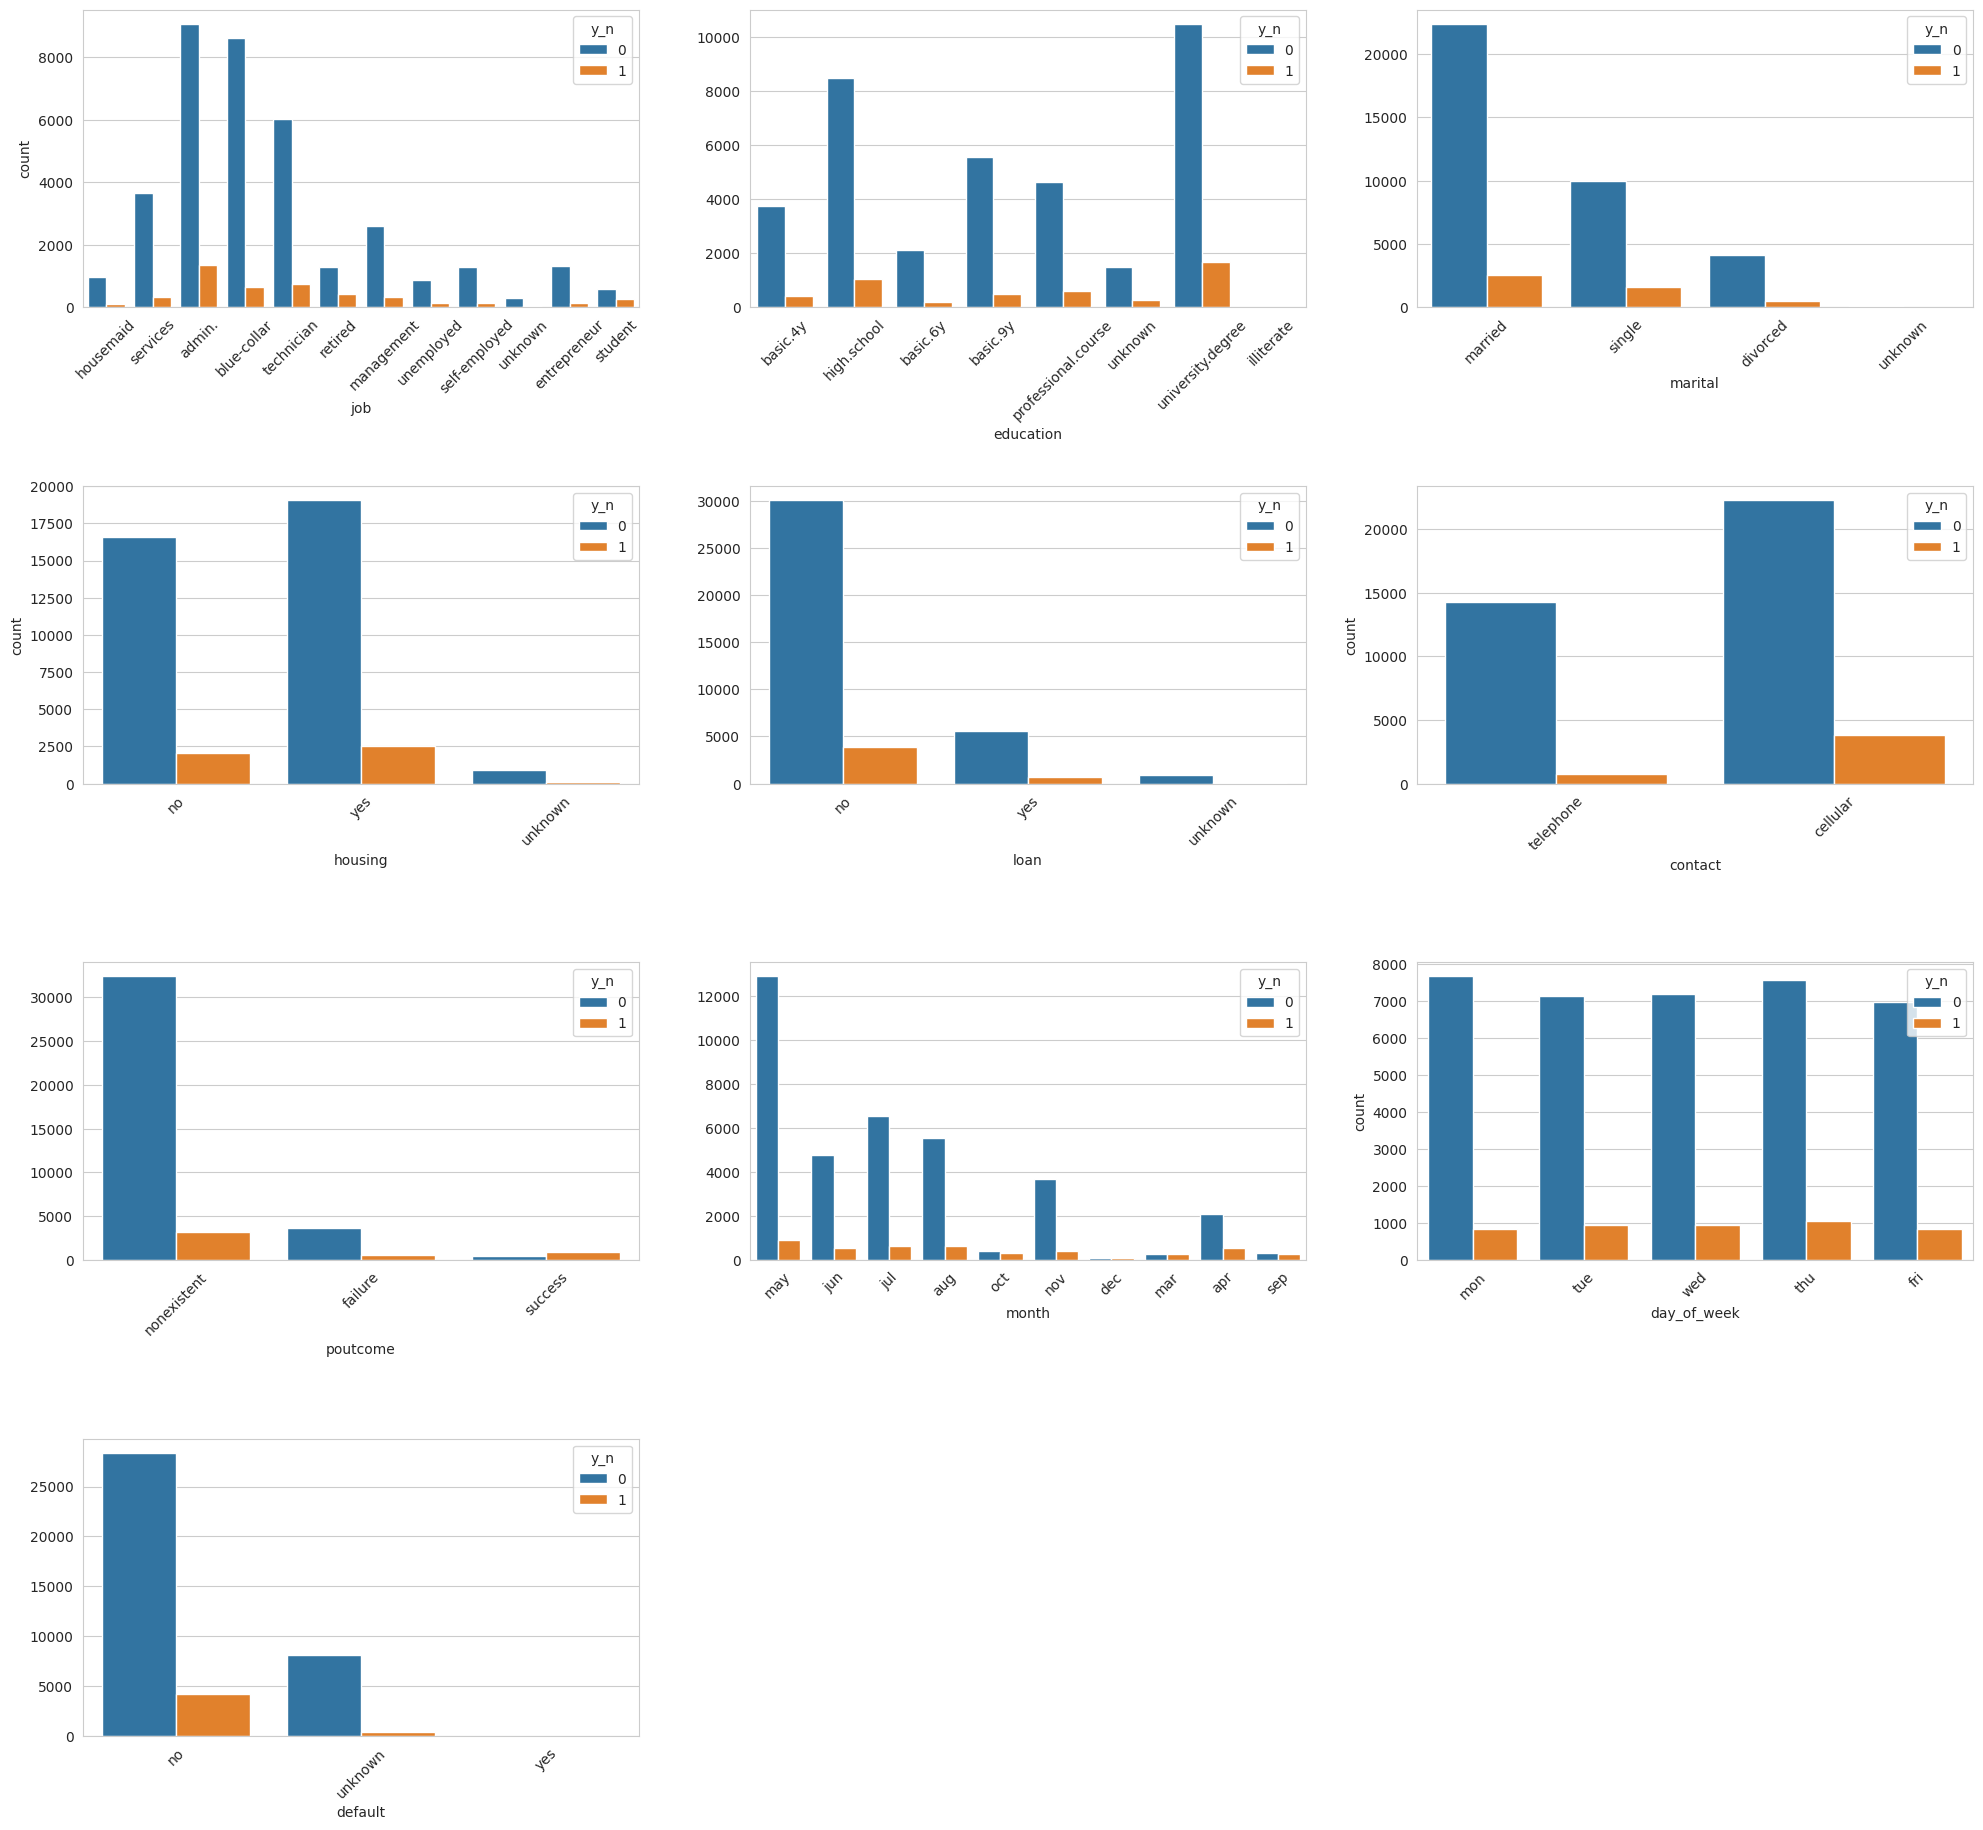

In [ ]:
fig, axis = plt.subplots(4, 3, figsize = (20, 18))

sns.countplot(ax = axis[0, 0], data=df, x='job', hue='y_n')
plt.xticks(rotation=90)
sns.countplot(ax = axis[0, 1], data=df, x='education', hue='y_n').set(ylabel = None)
sns.countplot(ax = axis[0, 2], data=df, x='marital', hue='y_n').set(ylabel = None)
sns.countplot(ax = axis[1, 0], data=df, x='housing', hue='y_n')
sns.countplot(ax = axis[1, 1], data=df, x='loan', hue='y_n').set(ylabel = None)
sns.countplot(ax = axis[1, 2], data=df, x='contact', hue='y_n')
sns.countplot(ax = axis[2, 0], data=df, x='poutcome', hue='y_n').set(ylabel = None)
sns.countplot(ax = axis[2, 1], data=df, x='month', hue='y_n').set(ylabel = None)
sns.countplot(ax = axis[2, 2], data=df, x='day_of_week', hue='y_n')
sns.countplot(ax = axis[3, 0], data=df, x='default', hue='y_n').set(ylabel = None)

plt.tight_layout()
fig.delaxes(axis[3, 1])
fig.delaxes(axis[3, 2])
plt.subplots_adjust(wspace=0.20, hspace=0.6)

for ax in axis.ravel():
    ax.tick_params(axis='x', labelrotation=45)
plt.show()

> #### Observaciones:
>
> - Los clientes que más contratan el depósito a largo plazo suelen tener profesiones como administrativos, técnicos y jubilados, lo que sugiere estabilidad económica.
> - El nivel educativo influye: quienes poseen educación universitaria o secundaria alta tienden a aceptar más la oferta.
> - Los solteros parecen tener una ligera mayor tasa de aceptación que los casados.
> - La comunicación por celular muestra una efectividad mucho mayor que la telefónica.
> - Los mejores resultados se observan en clientes con contactos previos exitosos y sin deudas o préstamos pendientes.  
En resumen, el perfil ideal a priorizar sería: cliente con educación media o universitaria, sin deudas, contactado por celular, con historial de campañas exitosas y ocupación estable.

<Axes: xlabel='job'>

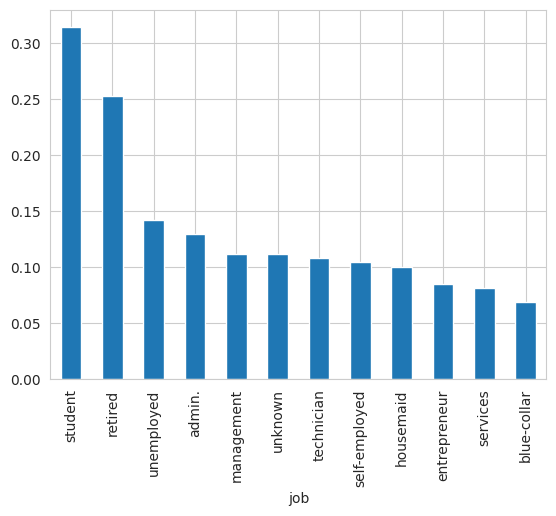

In [ ]:
# Calculate the success rate
df.groupby('job')['y_n'].mean().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='education'>

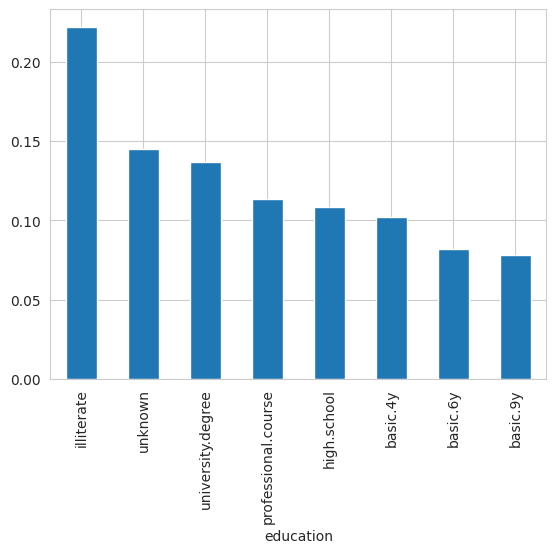

In [ ]:
df.groupby('education')['y_n'].mean().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='month'>

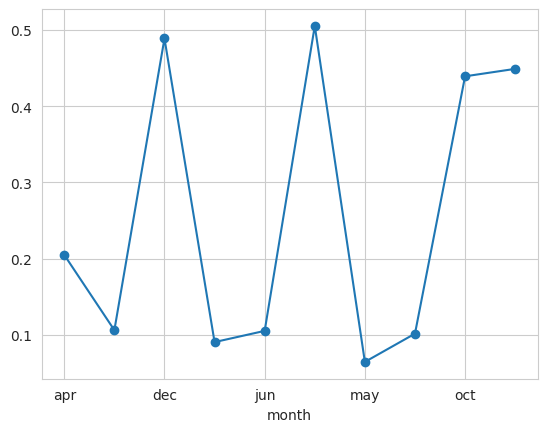

In [ ]:
# A graph showing success rates by month or day of the week
df.groupby('month')['y_n'].mean().plot(kind='line', marker='o')

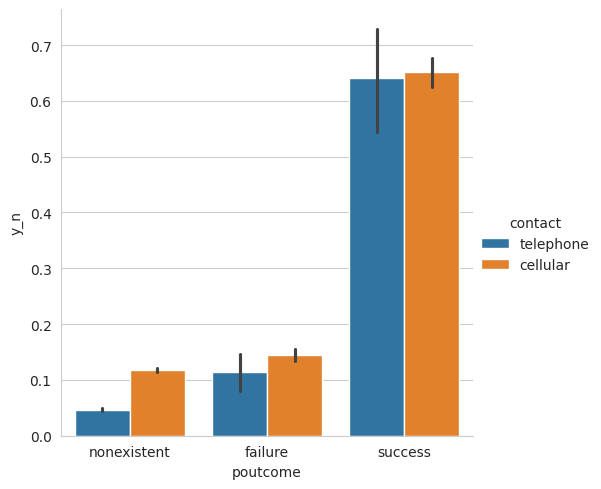

In [ ]:
sns.catplot(data=df, x='poutcome', y='y_n', hue='contact', kind='bar')

<Axes: xlabel='y_n', ylabel='duration'>

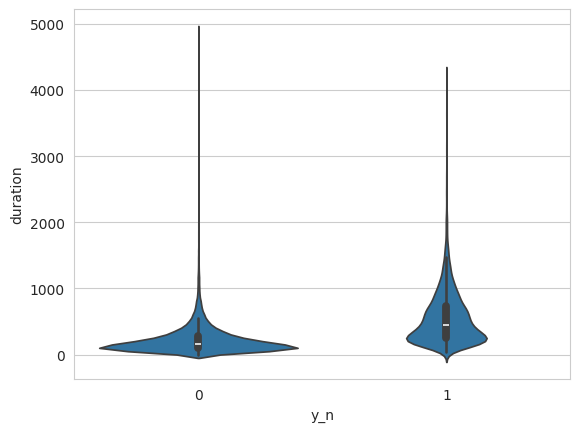

In [ ]:
sns.violinplot(data=df, x='y_n', y='duration')

#### Análisis de outliers

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100


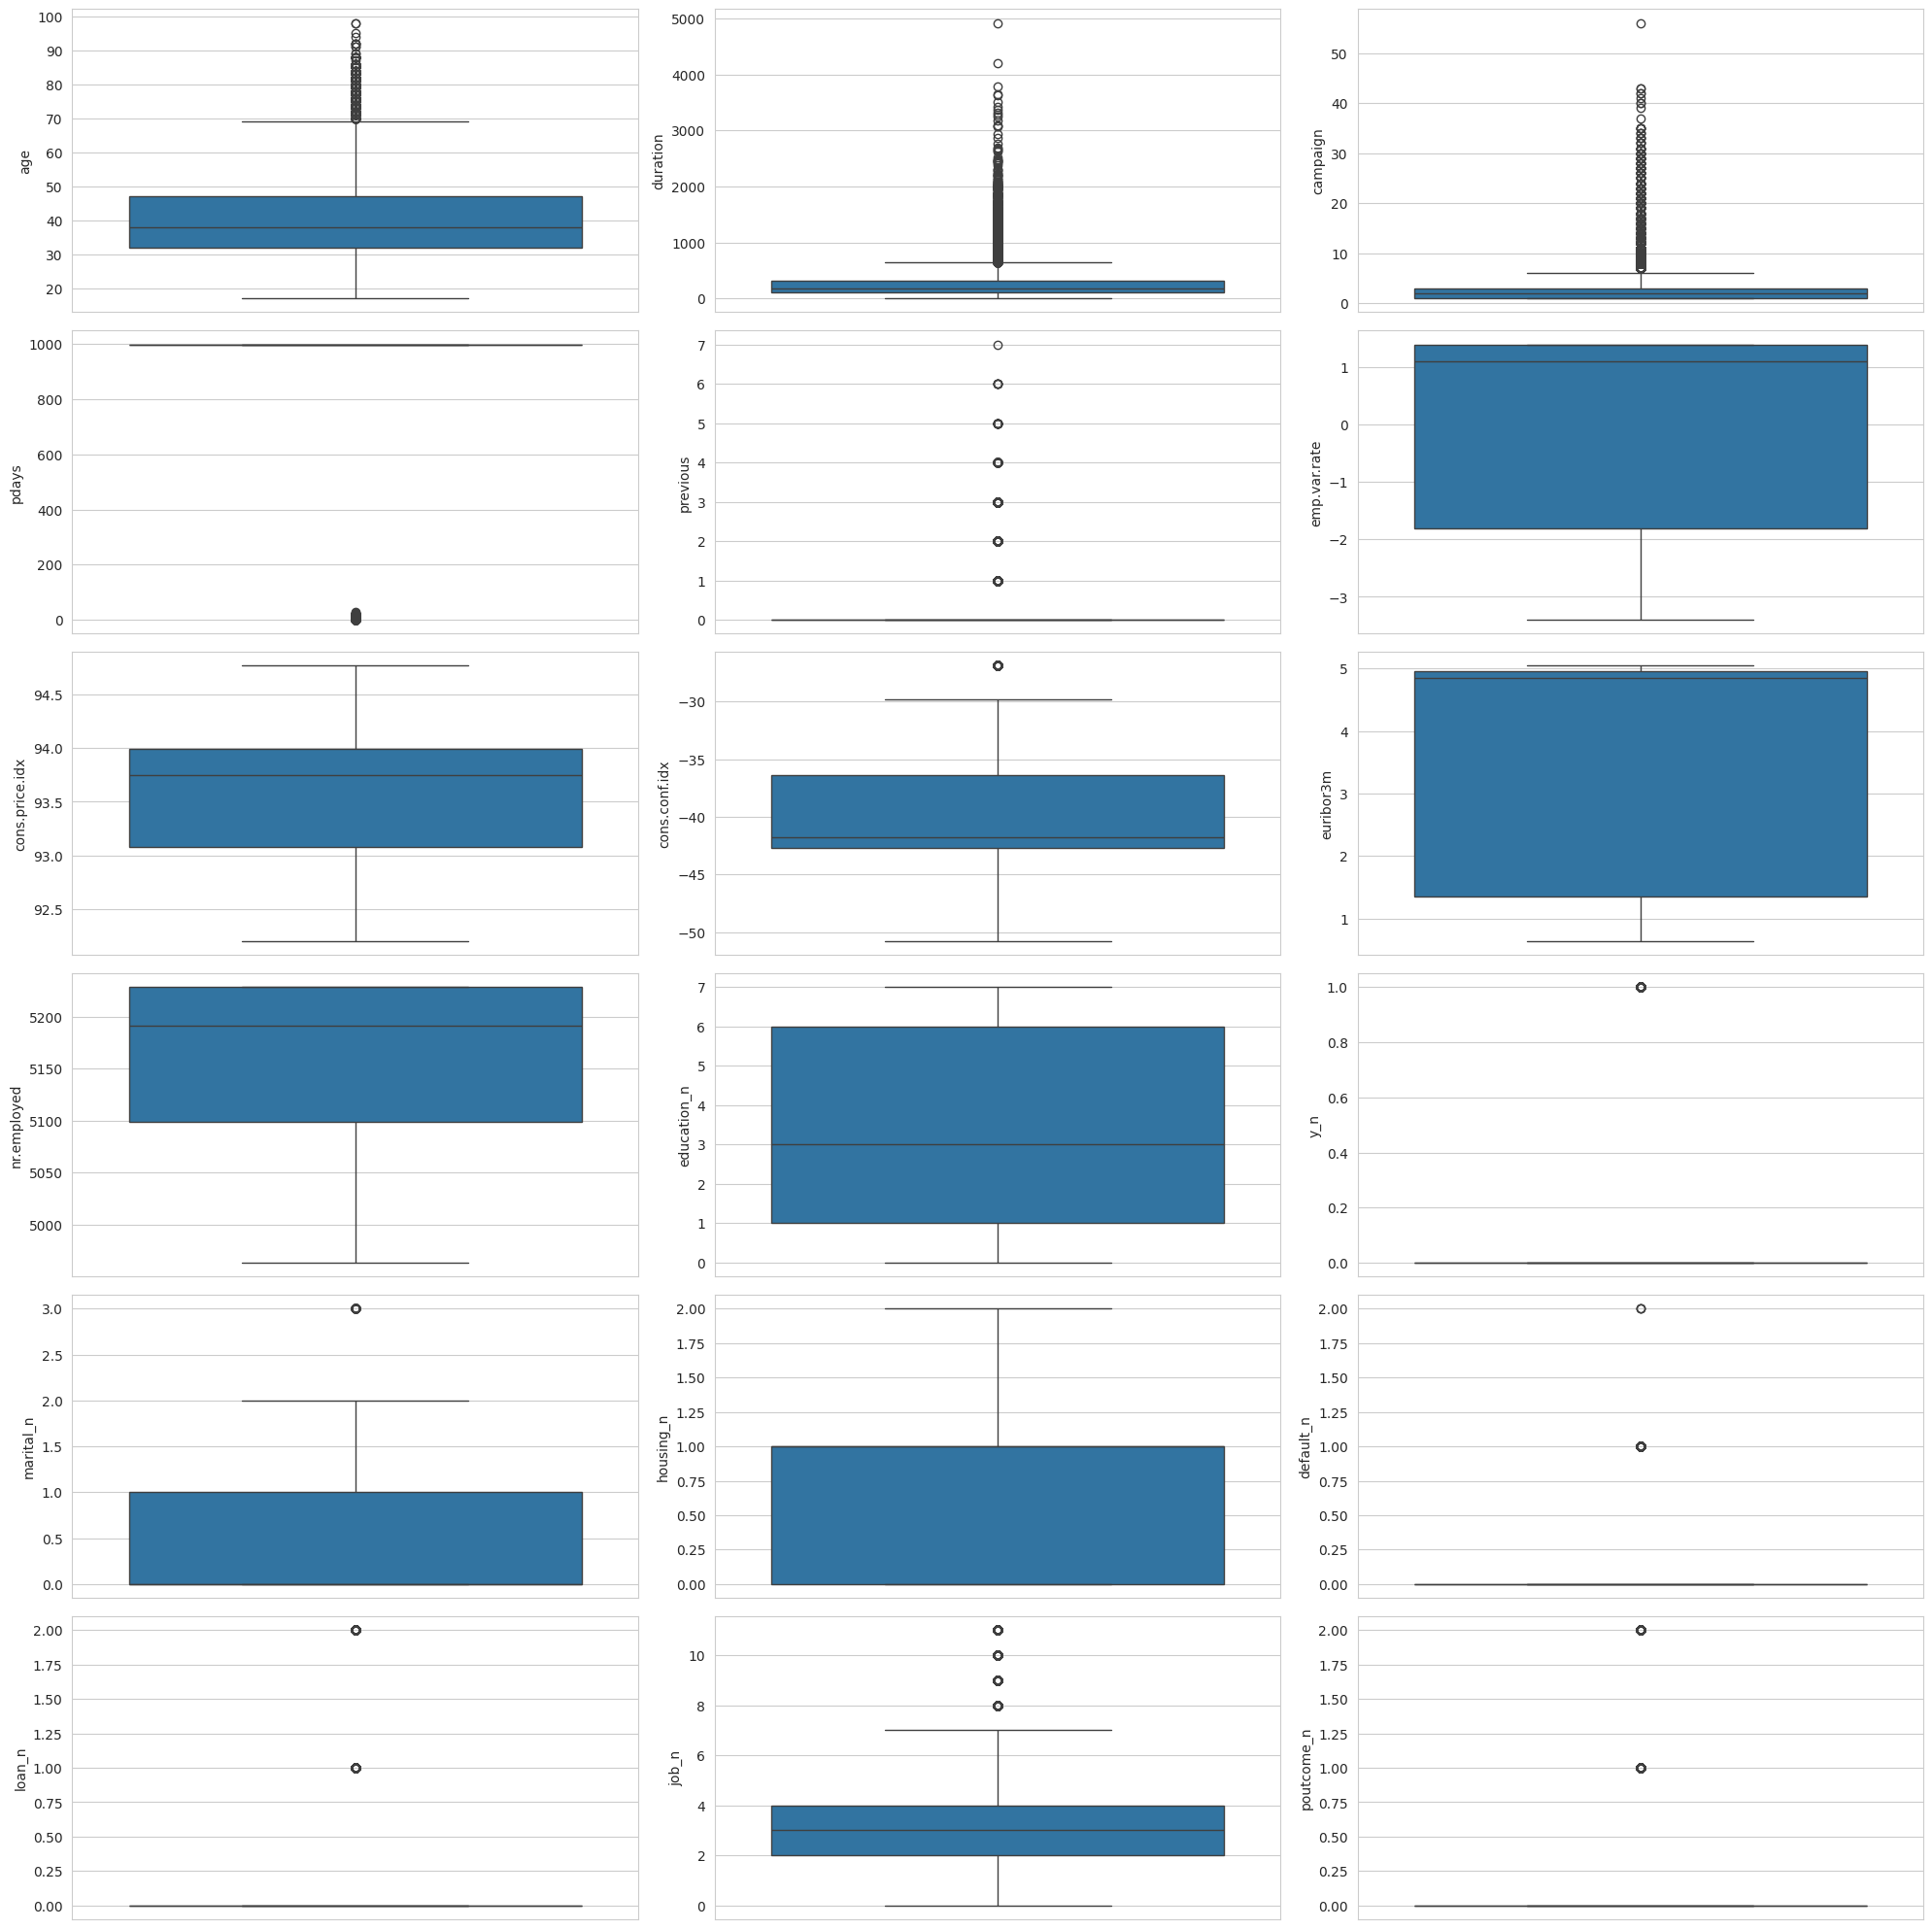

In [ ]:
fig, axis = plt.subplots(6, 3, figsize=(20, 20))

sns.boxplot(ax=axis[0, 0], data=df, y='age')
sns.boxplot(ax=axis[0, 1], data=df, y='duration')
sns.boxplot(ax=axis[0, 2], data=df, y='campaign')
sns.boxplot(ax=axis[1, 0], data=df, y='pdays')
sns.boxplot(ax=axis[1, 1], data=df, y='previous')
sns.boxplot(ax=axis[1, 2], data=df, y='emp.var.rate')
sns.boxplot(ax=axis[2, 0], data=df, y='cons.price.idx')
sns.boxplot(ax=axis[2, 1], data=df, y='cons.conf.idx')
sns.boxplot(ax=axis[2, 2], data=df, y='euribor3m')
sns.boxplot(ax=axis[3, 0], data=df, y='nr.employed')
sns.boxplot(ax=axis[3, 1], data=df, y='education_n')
sns.boxplot(ax=axis[3, 2], data=df, y='y_n')
sns.boxplot(ax=axis[4, 0], data=df, y='marital_n')
sns.boxplot(ax=axis[4, 1], data=df, y='housing_n')
sns.boxplot(ax=axis[4, 2], data=df, y='default_n')
sns.boxplot(ax=axis[5, 0], data=df, y='loan_n')
sns.boxplot(ax=axis[5, 1], data=df, y='job_n')
sns.boxplot(ax=axis[5, 2], data=df, y='poutcome_n')

plt.subplots_adjust(wspace=0.20, hspace=0.8)
plt.tight_layout()
plt.show()

> #### Observaciones
>
> Podemos determinar fácilmente que las variables afectadas por outliers son ``, ``, `` , ``. 

Por ejemplo, si queremos aplicar el segundo punto de los anteriores para el caso de la columna ``:

In [ ]:
duration_stats = df['duration'].describe()
duration_stats

count    41176.000000
mean       258.315815
std        259.305321
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [ ]:
q1 = df['duration'].quantile(0.25)
q3 = df['duration'].quantile(0.75)
iqr = q3 - q1

lower_limit = 0 if (q1 - 1.5 * iqr) < 0 else q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

f"Límites superior: {round(upper_limit, 2)}, límite inferior: {round(lower_limit, 2)}, rango intercuartílico: {round(iqr, 2)}"

'Límites superior: 644.5, límite inferior: 0, rango intercuartílico: 217.0'

In [ ]:
df[df['duration'] > 4000]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,nr.employed,y,education_n,y_n,marital_n,housing_n,default_n,loan_n,job_n,poutcome_n
22192,52,blue-collar,married,basic.4y,no,no,no,telephone,aug,thu,...,5228.1,yes,0,1,0,0,0,0,3,0
24091,33,technician,single,professional.course,no,yes,no,telephone,nov,mon,...,5195.8,no,4,0,1,1,0,0,4,0


> #### Observaciones
>
> En este caso vemos que uno de los clientes han contratado el déposito después de una conversación larga. Por lo tanto, sumado al análisis bivariado anterior, existe una implicación entre la duracion de llamada y el resultado final de contratación de deposito. 
>
> #### Conclusiones
>
> Por lo observado decidimos que **mantenemos los valores atípicos**.


#### Análisis de valores faltantes

In [ ]:
# Number of columns
df.shape[1]

29

In [ ]:
# To obtain the percentage (or proportion) of null values in each column.
df.isnull().sum() / df.shape[0]

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
education_n       0.0
y_n               0.0
marital_n         0.0
housing_n         0.0
default_n         0.0
loan_n            0.0
job_n             0.0
poutcome_n        0.0
dtype: float64

## **Dividir, one hot encoding, escalado**

### Realizamos el split

In [ ]:
df.shape

(41176, 29)

In [ ]:
df.drop(['education_n', 'y_n', 'marital_n', 'housing_n', 'default_n', 'loan_n', 'job_n', 'poutcome_n'], axis=1, inplace=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [48]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

In [49]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,euribor3m,nr.employed,education_n,y_n,marital_n,housing_n,default_n,loan_n,job_n,poutcome_n
6707,35,blue-collar,divorced,basic.4y,no,yes,yes,telephone,may,wed,...,4.857,5191.0,0,0,2,1,0,1,3,0
38289,37,technician,married,university.degree,no,yes,no,cellular,oct,wed,...,0.742,5017.5,6,1,0,1,0,0,4,1
25861,34,admin.,married,university.degree,no,yes,no,cellular,nov,wed,...,4.120,5195.8,6,0,0,1,0,0,2,0
20623,33,admin.,single,university.degree,no,no,no,cellular,aug,wed,...,4.965,5228.1,6,0,1,0,0,0,2,0
27944,32,admin.,single,university.degree,no,unknown,unknown,cellular,mar,mon,...,1.520,5099.1,6,0,1,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5295,41,self-employed,married,university.degree,no,yes,no,telephone,may,fri,...,4.857,5191.0,6,0,0,1,0,0,8,0
1727,33,technician,married,professional.course,no,no,no,telephone,may,fri,...,4.855,5191.0,4,0,0,0,0,0,4,0
35663,37,admin.,divorced,university.degree,unknown,yes,no,cellular,may,mon,...,1.244,5099.1,6,1,2,1,1,0,2,0
25728,45,admin.,married,high.school,no,yes,no,cellular,nov,wed,...,4.120,5195.8,1,0,0,1,0,0,2,1


In [ ]:
X_train.columns

In [ ]:
y_test.shape